## Import all the Important Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


## Import the Data and Inspect the data

In [70]:
# create a dataframe and read the dataset
house_data = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [71]:
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [72]:
# Inspect the data by checking on :
  ##No. of rows, columns, 
  ##datatypes of columns, 
  ##check if there is any NUll values in column, 
  ##check some numerical summaries on the data

In [73]:
##No. of rows, columns
house_data.shape

(1460, 81)

In [74]:
##datatypes of columns
house_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [75]:
##check if there is any NUll values in column
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [76]:
##check some numerical summaries on the data
house_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

### Observations on Data inspection:
There are 1460 rows and 81 columns </br>
Null values are present in multiple columns


In [77]:
house_data_nulls=house_data.isnull().sum().sort_values(ascending=False)
house_data_nulls[house_data_nulls>0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [78]:
## percentage nullValues
round(house_data_nulls[house_data_nulls>0]/len(house_data)*100,2)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
Electrical       0.07
dtype: float64

### Observation on null values
There are Total 19 features which has Null values </br>
Out of which 6 features have more that 40% null values which would be dropped later during treating missing values

### Data Preparation and Data Cleaning

In [79]:
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [80]:
# Check number of numerical and categorical columns/features

num_cols = []
cat_cols = []
for i in house_data.columns:
    if house_data[i].dtypes != 'O':
        num_cols.append(i)
    else:
        cat_cols.append(i)
print('Total numerical features in the dataset = ', len(num_cols) )
print('Total categorical features in the dataset = ', len(cat_cols), 'categorical features in the dataset')

Total numerical features in the dataset =  38
Total categorical features in the dataset =  43 categorical features in the dataset


In [81]:
# correlation matrix
##cor = house_data.corr()

In [82]:
## Drop the columns "id" which is not needed as feature variable
house_data.drop(['Id'], axis=1, inplace=True)

In [83]:
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

## Exploratory Data Analysis (EDA) 

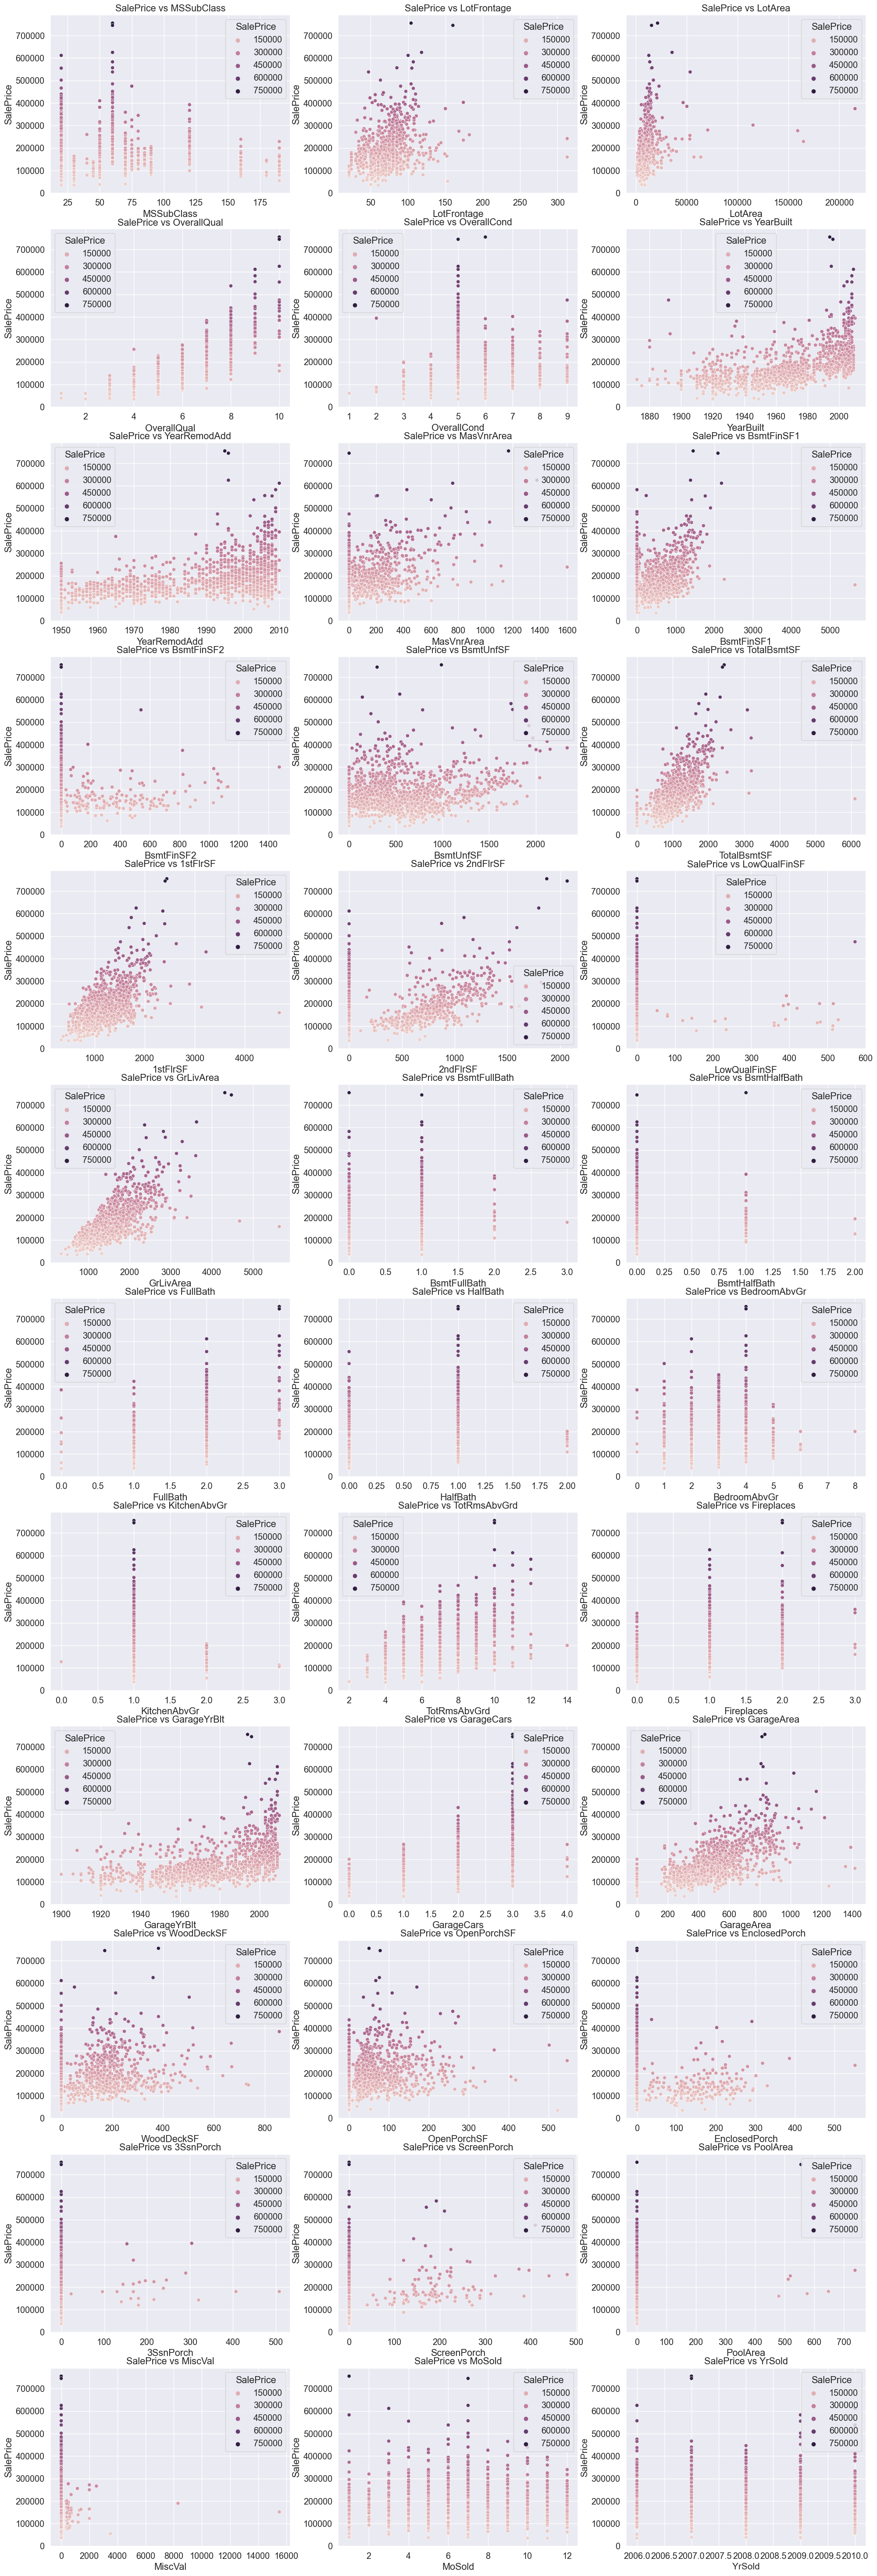

In [84]:
## Now we will see the distribution of data of different features
#Visualising numerical input variables with Target Variable 'SalePrice'
data_num = house_data.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(24,75))
for i,ax in zip(data_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=data_num,ax=ax)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('SalePrice',fontsize=15)
    ax.set_title('SalePrice'+' vs '+str(i))

### Observations:
GrLivArea,1stfloorSF,2ndFloorSF has some kind of linear relationship with Salesprice </br>
Newer built house is expensive with year</br>
Salesprice directly increases with GarageCars(Size of garage in car capacity)<br>
There are some outliers which need to be checked

In [85]:
## Check for outliers and treat outliers/delete
fig = plt.figure(figsize=(1,1))

#function to plot scatter plot between a feature and the Sale Price target column
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = house_data[a], y = house_data['SalePrice'])
    plt.ylabel('SalePrice', fontsize=6)
    plt.xlabel(a, fontsize=6)
    plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
    plt.show()

<Figure size 100x100 with 0 Axes>

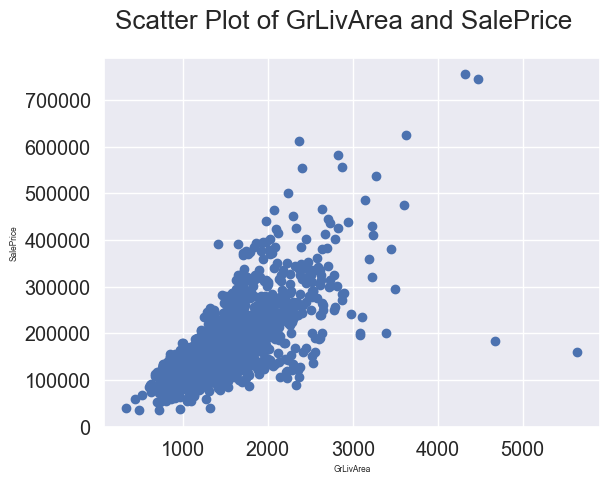

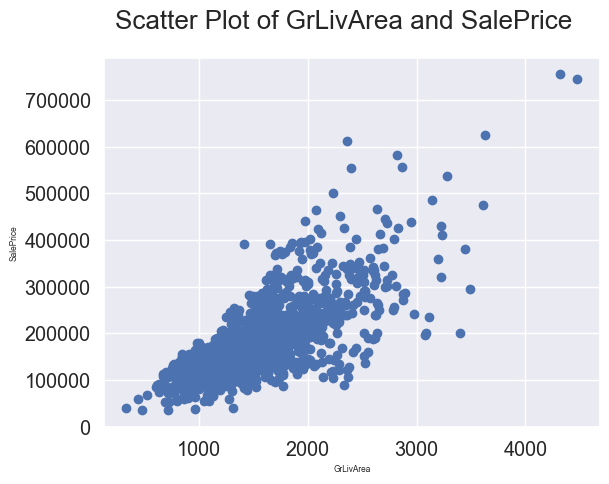

In [86]:
# plot before deleting outliers
scatter_plot('GrLivArea')
#plot after deleting the large outliers
house_data =  house_data.drop( house_data[( house_data['GrLivArea'] > 4000) & ( house_data['SalePrice']<300000)].index)

#Check the graphic again
scatter_plot('GrLivArea')

#The second plot below is after deleting the outliers

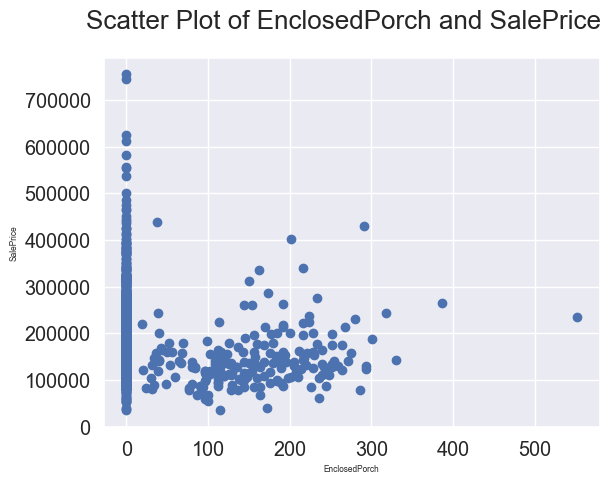

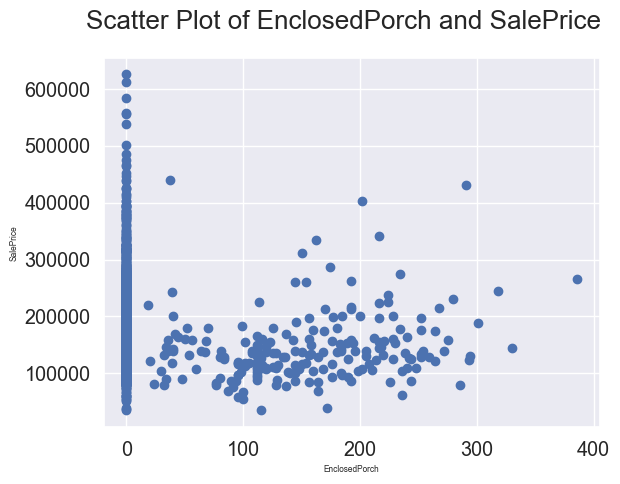

In [87]:
scatter_plot('EnclosedPorch')
#Deleting outliers
house_data =  house_data.drop( house_data[( house_data['EnclosedPorch']>400)].index)

#Deleting outliers
house_data =  house_data.drop( house_data[( house_data['SalePrice']>700000)].index)

#check plot again
scatter_plot('EnclosedPorch')

In [88]:
## Earlier we saw that there are 6 attributes which has lot of missing values and can be dropped
## percentage nullValues
round(house_data_nulls[house_data_nulls>0]/len(house_data)*100,2)

PoolQC          99.86
MiscFeature     96.63
Alley           94.09
Fence           81.03
MasVnrType      59.93
FireplaceQu     47.42
LotFrontage     17.80
GarageYrBlt      5.57
GarageCond       5.57
GarageType       5.57
GarageFinish     5.57
GarageQual       5.57
BsmtFinType2     2.61
BsmtExposure     2.61
BsmtQual         2.54
BsmtCond         2.54
BsmtFinType1     2.54
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [89]:
# Drop the columns having most missing values
house_data.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'], axis=1, inplace=True)
#house_data = house_data.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'], axis=1,inplace=True)

In [90]:
house_data.head().T

0        1        2        3        4
MSSubClass          60       20       60       70       60
MSZoning            RL       RL       RL       RL       RL
LotFrontage       65.0     80.0     68.0     60.0     84.0
LotArea           8450     9600    11250     9550    14260
Street            Pave     Pave     Pave     Pave     Pave
LotShape           Reg      Reg      IR1      IR1      IR1
LandContour        Lvl      Lvl      Lvl      Lvl      Lvl
Utilities       AllPub   AllPub   AllPub   AllPub   AllPub
LotConfig       Inside      FR2   Inside   Corner      FR2
LandSlope          Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood   CollgCr  Veenker  CollgCr  Crawfor  NoRidge
Condition1        Norm    Feedr     Norm     Norm     Norm
Condition2        Norm     Norm     Norm     Norm     Norm
BldgType          1Fam     1Fam     1Fam     1Fam     1Fam
HouseStyle      2Story   1Story   2Story   2Story   2Story
OverallQual          7        6        7        7        8
OverallCond          5        8        5        5        5
YearBuilt         2003     1976     2001     1915     2000
YearRemodAdd      2003     1976     2002     1970     2000
RoofStyle        Gable    Gable    Gable    Gable    Gable
RoofMatl       CompShg  CompShg  CompShg  CompShg  CompShg
Exterior1st    VinylSd  MetalSd  VinylSd  Wd Sdng  VinylSd
Exterior2nd    VinylSd  MetalSd  VinylSd  Wd Shng  VinylSd
MasVnrArea       196.0      0.0    162.0      0.0    350.0
ExterQual           Gd       TA       Gd       TA       Gd
ExterCond           TA       TA       TA       TA       TA
Foundation       PConc   CBlock    PConc   BrkTil    PConc
BsmtQual            Gd       Gd       Gd       TA       Gd
BsmtCond            TA       TA       TA       Gd       TA
BsmtExposure        No       Gd       Mn       No       Av
BsmtFinType1       GLQ      ALQ      GLQ      ALQ      GLQ
BsmtFinSF1         706      978      486      216      655
BsmtFinType2       Unf      Unf      Unf      Unf      Unf
BsmtFinSF2           0        0        0        0        0
BsmtUnfSF          150      284      434      540      490
TotalBsmtSF        856     1262      920      756     1145
Heating           GasA     GasA     GasA     GasA     GasA
HeatingQC           Ex       Ex       Ex       Gd       Ex
CentralAir           Y        Y        Y        Y        Y
Electrical       SBrkr    SBrkr    SBrkr    SBrkr    SBrkr
1stFlrSF           856     1262      920      961     1145
2ndFlrSF           854        0      866      756     1053
LowQualFinSF         0        0        0        0        0
GrLivArea         1710     1262     1786     1717     2198
BsmtFullBath         1        0        1        1        1
BsmtHalfBath         0        1        0        0        0
FullBath             2        2        2        1        2
HalfBath             1        0        1        0        1
BedroomAbvGr         3        3        3        3        4
KitchenAbvGr         1        1        1        1        1
KitchenQual         Gd       TA       Gd       Gd       Gd
TotRmsAbvGrd         8        6        6        7        9
Functional         Typ      Typ      Typ      Typ      Typ
Fireplaces           0        1        1        1        1
GarageType      Attchd   Attchd   Attchd   Detchd   Attchd
GarageYrBlt     2003.0   1976.0   2001.0   1998.0   2000.0
GarageFinish       RFn      RFn      RFn      Unf      RFn
GarageCars           2        2        2        3        3
GarageArea         548      460      608      642      836
GarageQual          TA       TA       TA       TA       TA
GarageCond          TA       TA       TA       TA       TA
PavedDrive           Y        Y        Y        Y        Y
WoodDeckSF           0      298        0        0      192
OpenPorchSF         61        0       42       35       84
EnclosedPorch        0        0        0      272        0
3SsnPorch            0        0        0        0        0
ScreenPorch          0        0        0        0        0
PoolArea 

In [91]:
house_data.shape

(1455, 74)

In [92]:
## Checking the remaining Null values in the features
house_data_nulls=house_data.isnull().sum().sort_values(ascending=False)
house_data_nulls[house_data_nulls>0]
round(house_data_nulls[house_data_nulls>0]/len(house_data)*100,2)

LotFrontage     17.80
GarageYrBlt      5.57
GarageCond       5.57
GarageType       5.57
GarageFinish     5.57
GarageQual       5.57
BsmtFinType2     2.61
BsmtExposure     2.61
BsmtQual         2.54
BsmtFinType1     2.54
BsmtCond         2.54
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [93]:
## Treating remining missiing values
# Lot frontage is the feet of street connected to property, which is likely similar to the neighbourhood houses, so fill Median value
house_data["LotFrontage"] = house_data["LotFrontage"].fillna(house_data["LotFrontage"].median())

In [94]:
## Checking the remaining Null values in the features
house_data_nulls=house_data.isnull().sum().sort_values(ascending=False)
house_data_nulls[house_data_nulls>0]
round(house_data_nulls[house_data_nulls>0]/len(house_data)*100,2)

GarageType      5.57
GarageCond      5.57
GarageYrBlt     5.57
GarageFinish    5.57
GarageQual      5.57
BsmtFinType2    2.61
BsmtExposure    2.61
BsmtFinType1    2.54
BsmtCond        2.54
BsmtQual        2.54
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [95]:
# fill with the most frequent value(mode) for less no. of missing values
house_data['GarageType'] = house_data['GarageType'].fillna(house_data['GarageType'].mode()[0])

house_data['GarageCond'] = house_data['GarageCond'].fillna(house_data['GarageCond'].mode()[0])

house_data['GarageYrBlt'] = house_data['GarageYrBlt'].fillna(house_data['GarageYrBlt'].mode()[0])

house_data['GarageFinish'] = house_data['GarageFinish'].fillna(house_data['GarageFinish'].mode()[0])

house_data['GarageQual'] = house_data['GarageQual'].fillna(house_data['GarageQual'].mode()[0])

house_data['BsmtFinType2'] = house_data['BsmtFinType2'].fillna(house_data['BsmtFinType2'].mode()[0])

house_data['BsmtExposure'] = house_data['BsmtExposure'].fillna(house_data['BsmtExposure'].mode()[0])

house_data['BsmtFinType1'] = house_data['BsmtFinType1'].fillna(house_data['BsmtFinType1'].mode()[0])

house_data['BsmtCond'] = house_data['BsmtCond'].fillna(house_data['BsmtCond'].mode()[0])

house_data['BsmtQual'] = house_data['BsmtQual'].fillna(house_data['BsmtQual'].mode()[0])

house_data['MasVnrArea'] = house_data['MasVnrArea'].fillna(house_data['MasVnrArea'].mode()[0])

house_data['Electrical'] = house_data['Electrical'].fillna(house_data['Electrical'].mode()[0])


In [96]:
## Checking the remaining Null values in the features
house_data_nulls=house_data.isnull().sum().sort_values(ascending=False)
house_data_nulls[house_data_nulls>0]
round(house_data_nulls[house_data_nulls>0]/len(house_data)*100,2)

Series([], dtype: float64)

In [97]:
# calculate total number of null values in data
null_data = house_data.isnull().sum().sum()
print(null_data)


0


All the missing values have been treated

Correlation between features

In [98]:
# Visualize the correlation between the variables
# first we need to find the numnerical columns
house_data_num = house_data.select_dtypes(include=['float64', 'int64'])
house_data_num.head()
print(house_data_num.columns)
house_data_num.head(3)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   

   SalePrice  
0     208500  
1     181500  
2     223500

In [99]:
## Drop the categorical columns
# correlation matrix
cor = house_data_num.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.382236 -0.142760     0.032029    -0.058905   
LotFrontage     -0.382236     1.000000  0.270959     0.207520    -0.045539   
LotArea         -0.142760     0.270959  1.000000     0.087389    -0.001357   
OverallQual      0.032029     0.207520  0.087389     1.000000    -0.089455   
OverallCond     -0.058905    -0.045539 -0.001357    -0.089455     1.000000   
YearBuilt        0.028239     0.115095  0.008445     0.574399    -0.378068   
YearRemodAdd     0.040388     0.074474  0.006674     0.551111     0.075000   
MasVnrArea       0.023614     0.152027  0.081029     0.396196    -0.128282   
BsmtFinSF1      -0.075733     0.117219  0.172224     0.212026    -0.041243   
BsmtFinSF2      -0.065869     0.046365  0.113922    -0.058390     0.040881   
BsmtUnfSF       -0.140660     0.136725 -0.002769     0.311399    -0.138346   
TotalBsmtSF     -0.255727     0.287150  0.221375     0.532405    -0.175425   
1stFlrSF        -0.265206     0.357816  0.267310     0.461872    -0.145193   
2ndFlrSF         0.311215     0.037168  0.034911     0.278202     0.033676   
LowQualFinSF     0.045157     0.014419 -0.002666    -0.038300     0.033888   
GrLivArea        0.077288     0.300641  0.229520     0.582904    -0.075747   
BsmtFullBath     0.002956     0.063550  0.146611     0.103136    -0.052081   
BsmtHalfBath    -0.003695    -0.022698  0.043520    -0.051291     0.121810   
FullBath         0.131933     0.168311  0.116619     0.543507    -0.193564   
HalfBath         0.177745     0.035542  0.006779     0.268392    -0.060719   
BedroomAbvGr    -0.024053     0.240363  0.117678     0.095640     0.014623   
KitchenAbvGr     0.281867    -0.001486 -0.016358    -0.184204    -0.087472   
TotRmsAbvGrd     0.039988     0.299403  0.172850     0.415345    -0.054918   
Fireplaces      -0.046565     0.207888  0.259302     0.387148    -0.021701   
GarageYrBlt      0.099557     0.036274 -0.047491     0.440253    -0.302051   
GarageCars      -0.040587     0.273955  0.150773     0.598858    -0.185321   
GarageArea      -0.100680     0.296102  0.160846     0.554255    -0.149417   
WoodDeckSF      -0.012635     0.069215  0.167988     0.233740    -0.003796   
OpenPorchSF     -0.006552     0.106842  0.062216     0.298468    -0.030122   
EnclosedPorch   -0.014904    -0.014339 -0.025847    -0.124043     0.080694   
3SsnPorch       -0.043771     0.067990  0.021644     0.031754     0.025323   
ScreenPorch     -0.025901     0.044858  0.045940     0.068039     0.054392   
PoolArea         0.004017     0.014514  0.020352     0.004636     0.023891   
MiscVal         -0.007640     0.001277  0.039315    -0.031005     0.068691   
MoSold          -0.013158     0.030138  0.008487     0.077690    -0.004340   
YrSold          -0.020943     0.014193 -0.011603    -0.023039     0.042481   
SalePrice       -0.088392     0.338670  0.269381     0.800849    -0.079575   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.028239      0.040388    0.023614   -0.075733   -0.065869   
LotFrontage     0.115095      0.074474    0.152027    0.117219    0.046365   
LotArea         0.008445      0.006674    0.081029    0.172224    0.113922   
OverallQual     0.574399      0.551111    0.396196    0.212026   -0.058390   
OverallCond    -0.378068      0.075000   -0.128282   -0.041243    0.040881   
YearBuilt       1.000000      0.592855    0.309594    0.250393   -0.047426   
YearRemodAdd    0.592855      1.000000    0.173081    0.121533   -0.067353   
MasVnrArea      0.309594      0.173081    1.000000    0.232621   -0.070029   
BsmtFinSF1      0.250393      0.121533    0.232621    1.000000   -0.049598   
BsmtFinSF2     -0.047426     -0.067353   -0.070029   -0.049598    1.000000   
BsmtUnfSF       0.147846      0.181201    0.110775   -0.525735   -0.208840   
TotalBsmtSF     0.401281      0.294800    0.334113    0.460001    0.116090   
1stFlrSF        0.280923      0.2382

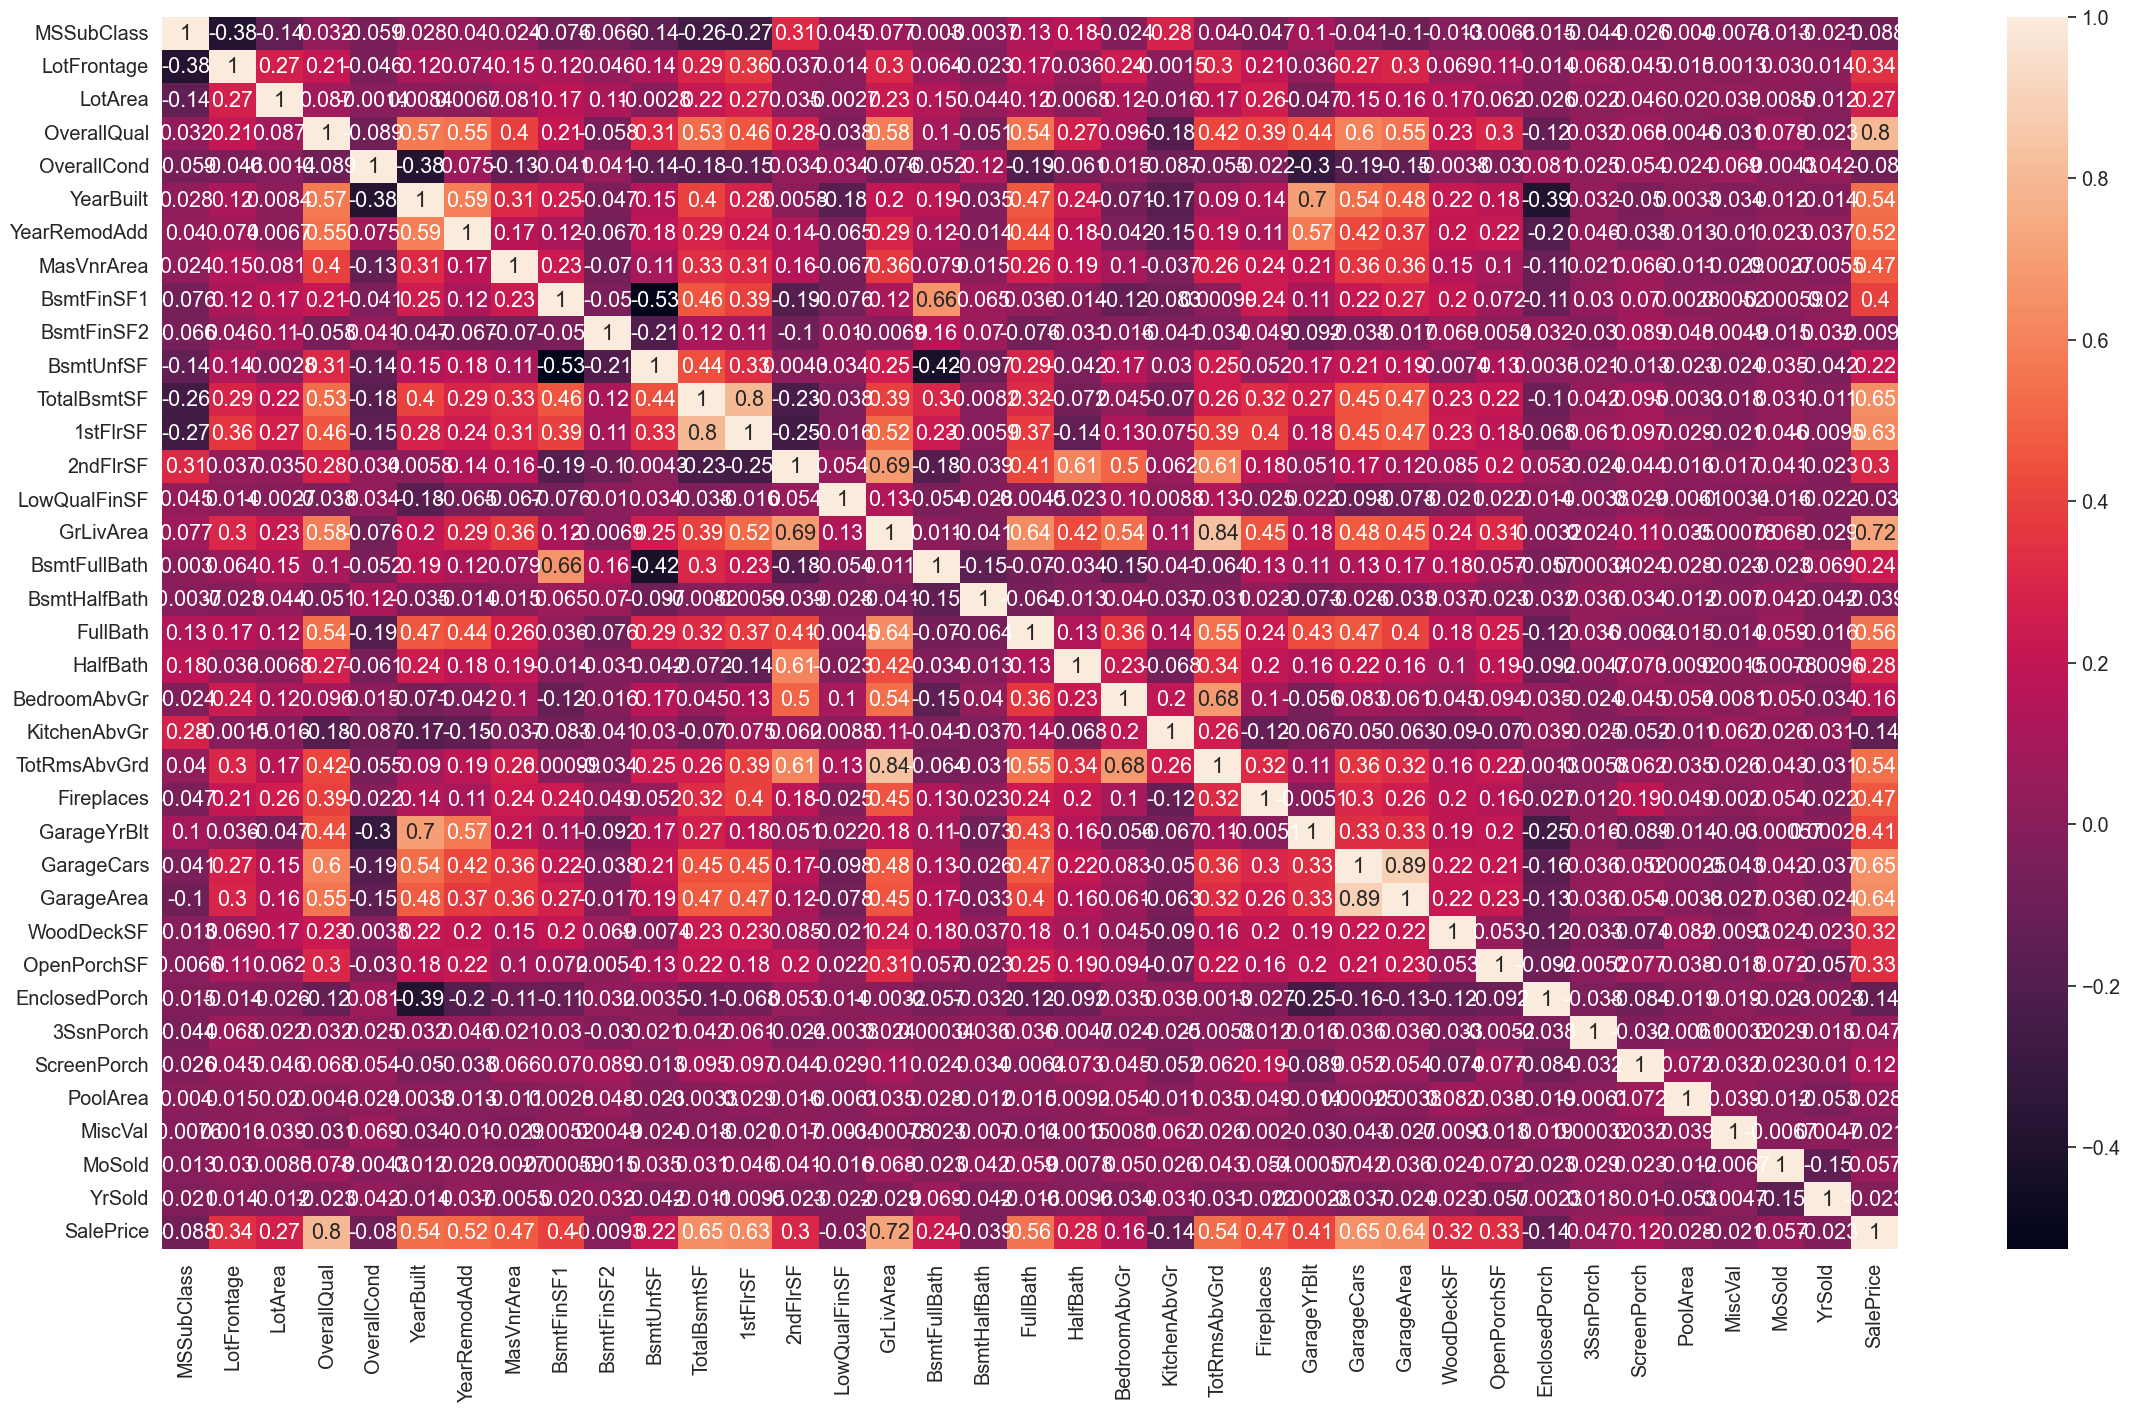

In [100]:
# plotting correlation on a heatmap
plt.figure(figsize=(28,16))
sns.heatmap(house_data_num.corr(), annot = True)
plt.show()

Text(74.74999999999999, 0.5, 'Features')

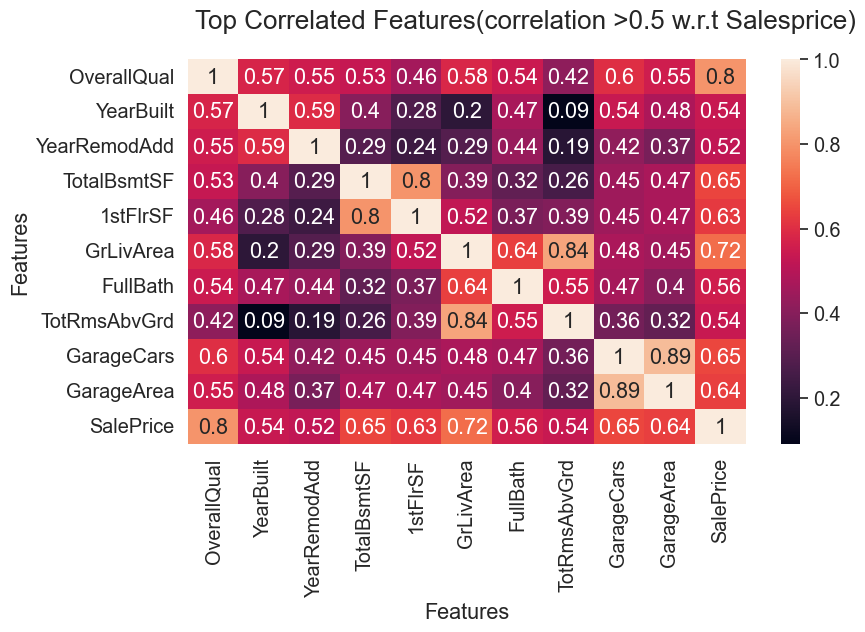

In [101]:
# most correlated features
corr_mat = house_data_num.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (9,5))

top_corr = corr_mat.index[abs(corr_mat["SalePrice"])>0.5]
g = sns.heatmap(house_data_num[top_corr].corr(),annot=True)
plt.suptitle("Top Correlated Features(correlation >0.5 w.r.t Salesprice)")
plt.xlabel("Features")
plt.ylabel("Features")

OverallQual,GrLivArea,GarageCars,GarageArea - these features seems to be highly correlated with SalesPrice

Top 6 correlated features - OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF

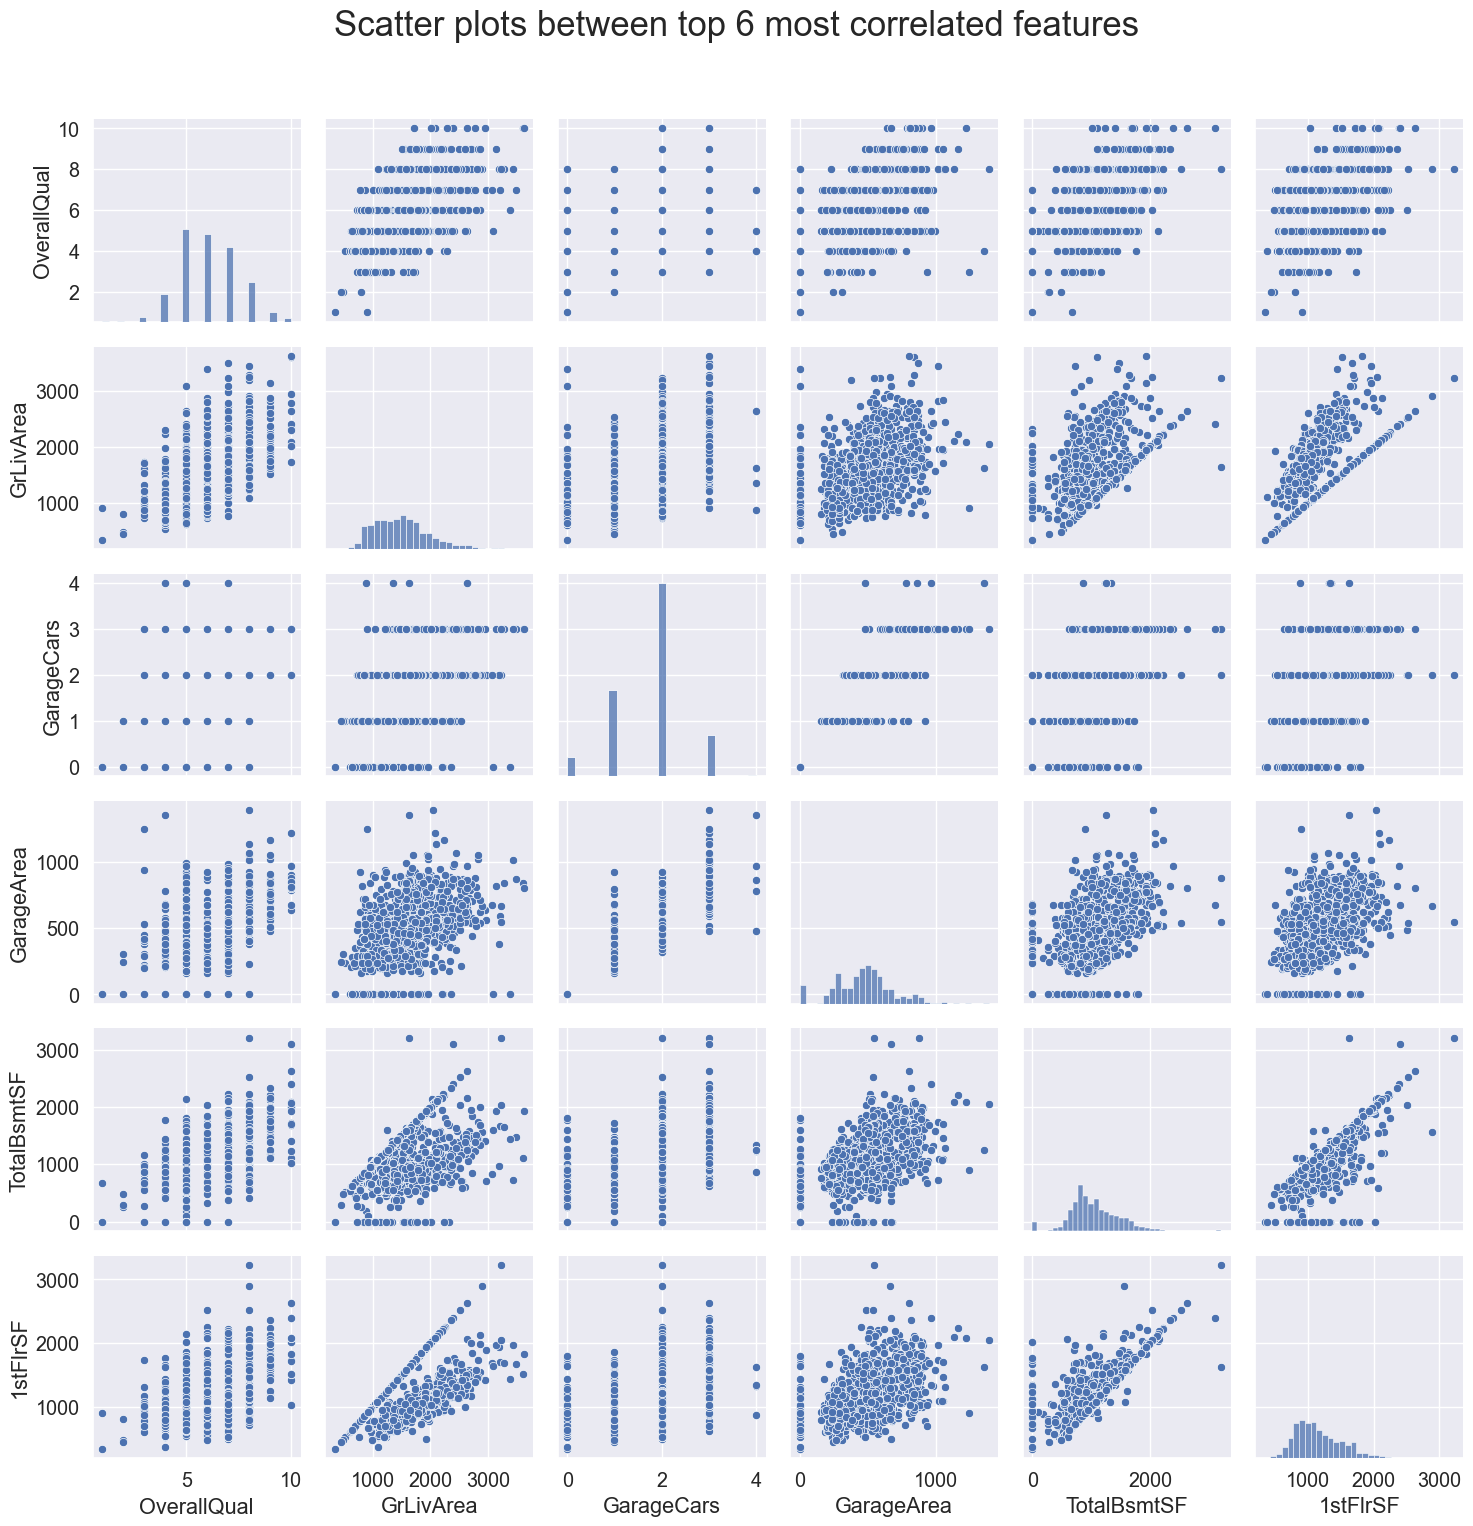

In [102]:
## check the top correlated features in pairplots to see the relationship
cols = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']
sns_plot = sns.pairplot(house_data[cols])

plt.suptitle('Scatter plots between top 6 most correlated features', y=1.02, size=25)
plt.tight_layout()
plt.show()

## Data Preparation

In [103]:
house_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [104]:
##Split into X and y
# X is predictor variables list
# y is target or response variable
X=house_data.loc[:,['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]
y = house_data['SalePrice']

In [105]:
# Create Dummy variables for the categorical variables

# subset all categorical variables
house_data_cat = X.select_dtypes(include=['object'])
house_data_cat.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   
1     MetalSd     MetalSd        TA        TA     CBlock       Gd       TA   
2     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   
3     Wd Sdng     Wd Shng        TA        TA     BrkTil       TA       Gd   
4     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0           No          GLQ          Unf    GasA        Ex          Y   
1           Gd          ALQ          Unf    GasA        Ex          Y   
2           Mn          GLQ          Unf    GasA        Ex          Y   
3           No          ALQ          Unf    GasA        Gd          Y   
4           Av          GLQ          Unf    GasA        Ex          Y   

  Electrical KitchenQual Functional GarageType GarageFinish GarageQual  \
0      SBrkr          Gd        Typ     Attchd          RFn         TA   
1      SBrkr          TA        Typ     Attchd          RFn         TA   
2      SBrkr          Gd        Typ     Attchd          RFn         TA   
3      SBrkr          Gd        Typ     Detchd          Unf         TA   
4      SBrkr          Gd        Typ     Attchd          RFn         TA   

  GarageCond PavedDrive SaleType SaleCondition  
0         TA          Y       WD        Normal  
1         TA          Y       WD        Normal  
2         TA          Y       WD        Normal  
3         TA          Y       WD       Abnorml  
4         TA          Y       WD        Normal

In [106]:
# convert to dummies - one hot encoding
house_dummies = pd.get_dummies(house_data_cat, drop_first=True)
house_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0        False        False         True        False         True   
1        False        False         True        False         True   
2        False        False         True        False         True   
3        False        False         True        False         True   
4        False        False         True        False         True   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0         False         False          True            False            False   
1         False         False          True            False            False   
2         False         False         False            False            False   
3         False         False         False            False            False   
4         False         False         False            False            False   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0             True             False              False          False   
1             True             False              False           True   
2             True             False              False          False   
3             True             False              False          False   
4             True             False              False           True   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0          False              True          False          False   
1          False             False          False          False   
2          False              True          False          False   
3          False             False          False          False   
4          False             False          False          False   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                 False                False                 False   
1                 False                False                 False   
2                 False                False                 False   
3                 False                False                 False   
4                 False                False                 False   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                 False                  True                 False   
1                 False                 False                 False   
2                 False                  True                 False   
3                 False                 False                  True   
4                 False                 False                 False   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                 False                 False                False   
1                 False                 False                False   
2                 False                 False                False   
3                 False                 False                False   
4                 False                 False                False   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                 False                 False               False   
1                 False                 False               False   
2                 False                 False               False   
3                 False                 False               False   
4                 False                 False               False   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                 False                False                 False   
1                 False                False                 False   
2                 False                False                 False   
3                 False                False                 False   
4                 False                False                  True   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                 False                 False               False  

In [107]:
house_dummies.shape

(1455, 192)

In [108]:
# Drop all the categorical variables 
X = X.drop(list(house_data_cat.columns), axis=1)

In [109]:
# Concat the dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [110]:
# Feature Scaling - necessary before using the model
from sklearn.preprocessing import scale
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=229)

In [111]:
# Split the house data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model building and Evaluation

In [112]:
# Linear Regression
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [113]:
# Coefficients and intercept of Linear Regression model
print(lm.intercept_)
print(lm.coef_)

180119.18038867222
[ 6.77003054e-11  2.27373675e-11  2.04636308e-11  7.82165444e-11
  1.45519152e-11  1.45519152e-11 -2.00088834e-11 -3.18323146e-12
  4.34883108e+02  1.63328113e+02  4.47108474e+02 -4.16786272e+02
  3.46318028e+02  4.03935429e+02  4.46642182e+01 -4.64260820e+02
  3.63797881e-12 -9.09494702e-12 -1.09139364e-11 -4.32009983e-12
  1.09139364e-11 -1.18234311e-11  1.09139364e-11 -5.91171556e-12
 -6.13908924e-12 -5.00222086e-11  2.02362571e-11 -1.00612851e-11
 -6.31272812e-12  3.24007488e-12  1.97815098e-11  2.45563569e-11
  3.45607987e-11 -7.27027327e-11 -2.27373675e-13 -3.39923645e-11
  7.66831029e+04 -4.54747351e-11 -1.90993887e-11 -6.30961949e-11
 -2.45563569e-11  2.54658516e-11 -1.11413101e-11  9.09494702e-12
 -5.45696821e-12 -1.18234311e-11  1.84741111e-12 -1.50066626e-11
  2.09851975e+01  3.63797881e-12  1.98951966e-11  8.86757334e-12
  1.97815098e-11  8.38440428e-12  2.50111043e-11 -4.43378667e-12
 -4.09272616e-12 -4.18367563e-11 -1.77351467e-11 -1.28466127e-11
 -1.37

In [114]:
from sklearn.metrics import r2_score, mean_squared_error

In [115]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

1.0
0.9999832391998299
2.5134643918587295e-17
45872674.55057448
2.4690219959319544e-20
104971.79531023909


## Residual Analysis

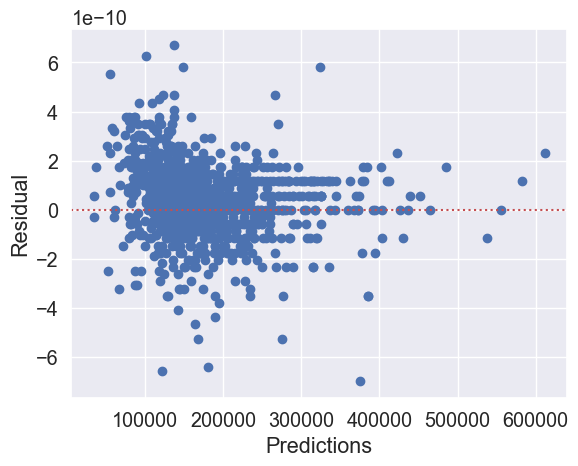

In [116]:
y_res = y_train - y_pred_train
# data['res'] = y_res
plt.scatter( y_pred_train ,y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

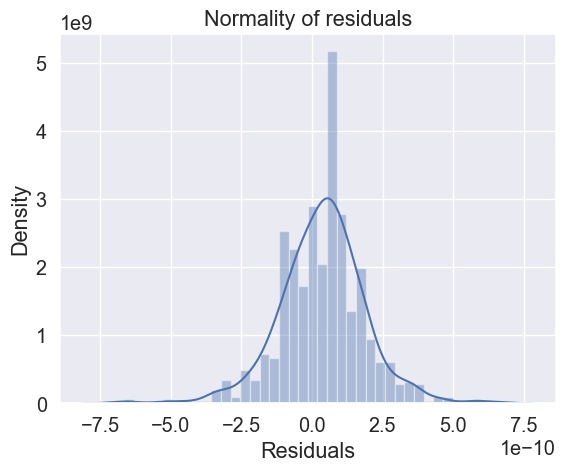

In [117]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of residuals')
plt.xlabel("Residuals")
plt.show()

In [118]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [119]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.588235     0.167702  0.026432        0.625     0.428571   0.963768   
1    0.000000     0.298137  0.038328        0.500     0.428571   0.659420   
2    0.000000     0.428571  0.051780        0.875     0.428571   0.949275   
3    0.176471     0.354037  0.075734        0.500     0.428571   0.550725   
4    0.000000     0.298137  0.095328        0.500     1.000000   0.840580   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      0.933333    0.058750    0.000000         0.0   0.635392     0.426700   
1      0.216667    0.154375    0.278336         0.0   0.364608     0.434810   
2      0.900000    0.000000    0.582267         0.0   0.288899     0.591391   
3      0.000000    0.000000    0.000000         0.0   0.423595     0.284467   
4      0.950000    0.162500    0.369287         0.0   0.033442     0.274485   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.348739   0.00000           0.0   0.304419      0.000000           0.0   
1  0.357843   0.00000           0.0   0.312930      0.333333           0.0   
2  0.550420   0.00000           0.0   0.492962      0.333333           0.0   
3  0.189076   0.30033           0.0   0.333879      0.000000           0.5   
4  0.457983   0.00000           0.0   0.406547      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.666667       0.0         0.250      0.333333      0.272727    0.333333   
1  0.333333       0.5         0.375      0.333333      0.272727    0.666667   
2  0.666667       0.0         0.375      0.333333      0.454545    1.000000   
3  0.333333       0.0         0.375      0.333333      0.272727    0.333333   
4  0.666667       0.0         0.375      0.333333      0.181818    0.333333   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     0.954545        0.50    0.341007    0.154026     0.066922   
1     0.572727        0.50    0.369784    0.000000     0.145315   
2     0.936364        0.75    0.509353    0.242707     0.334608   
3     0.436364        0.25    0.237410    0.224037     0.000000   
4     0.800000        0.50    0.388489    0.340723     0.084130   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  \
0            0.0   0.000000     0.000000       0.0      0.0  0.727273    0.00   
1            0.0   0.000000     0.480519       0.0      0.0  0.545455    0.75   
2            0.0   0.000000     0.000000       0.0      0.0  0.909091    0.00   
3            0.0   0.000000     0.000000       0.0      0.0  0.000000    1.00   
4            0.0   0.447174     0.000000       0.0      0.0  1.000000    0.75   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0   0.290590          0.0          0.0          1.0          0.0          1.0   
1   0.215169          0.0          0.0          1.0          0.0          1.0   
2   0.563669          0.0          0.0          1.0          0.0          1.0   
3   0.108538          0.0          0.0          1.0          0.0          1.0   
4   0.324400          0.0          0.0          1.0          0.0          1.0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0           0.0           0.0           0.0              0.0              0.0   
1           0.0           0.0           0.0              0.0              0.0   
2           0.0           0.0           0.0              0.0              0.0   
3           0.0           0.0           1.0              0.0              0.0   
4           0.0           0.0           0.0              0.0              0.0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0              1.0               0.0                0.0            0.0   
1              1.0               0.0                0.0            0.0   
2              1.0               0.

## Ridge Regression

In [120]:
# list of alphas to tune.If value is too high it will lead to underfitting, 
#if it is too low, it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [121]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [122]:
#Fit Ridge model and printing coefficients which have been penalised
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-7.80656399e-01  2.08271779e+00  1.94275782e+01  5.42778003e+00
  4.03277590e+00  5.12886810e+00  6.06199998e-01  2.65468600e+00
  6.30276275e+00  8.61144840e-01  9.73534298e-01  5.25793933e+00
  6.45527214e+00  6.32260103e+00 -3.83865076e-01  9.73260950e+00
  5.12261285e-01 -1.11878509e+00 -4.22792867e-01  2.94981238e-01
 -1.92067619e+00 -5.13070222e+00  1.86057847e+00  2.01341691e-01
  5.89276737e-01  2.24896476e+00  6.28631231e-01  1.76117394e+00
  1.24304059e+00  1.30367189e+00  1.90736508e+00  1.40906973e+00
  4.74193014e+00  1.93880008e-01 -1.44311029e-01  2.23735364e-01
  5.76692631e+05  3.92337836e+00  2.47945927e+00  3.16984984e+00
  2.03966263e+00  3.36401831e+00  7.16576780e-01 -1.04351853e-01
  4.82587603e-02  3.61208798e-01 -1.53456708e+00  4.65613068e-01
  0.00000000e+00  8.82202864e-01 -4.03600916e-01 -1.10978935e+00
  1.25375323e-02  2.17975705e-01 -6.16524971e+00  2.20511201e+00
  1.39353752e+00  1.82465555e+00  2.29501358e-01 -4.03473226e-01
  3.35671810e+00 -2.09284

In [123]:
# Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9999999993607611
0.9999999984906506
3711.974481683874
4130.942105533283
3.6463403552886775
9.452956763234058


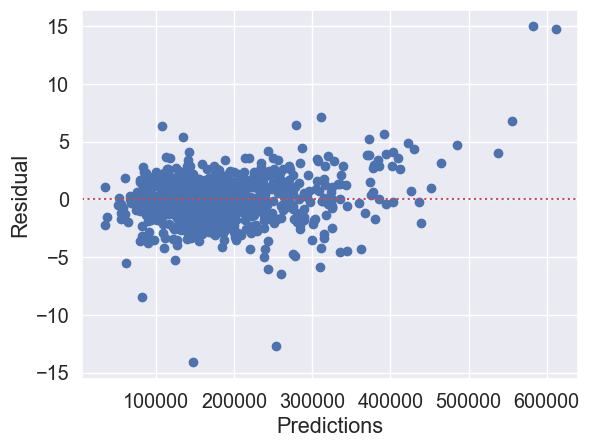

In [124]:
#  Residual Analysis and Evaluation of Linear Regression

y_res = y_train - y_pred_train
# data['res'] = y_res
plt.scatter( y_pred_train ,y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

## Lasso Regression

In [125]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [126]:
# Print the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [127]:
#Fit Lasso model for alpha = 4 and printing coefficients which have been penalised

alpha =2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=2)

In [128]:
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  9.95015714e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.05441125e+01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        5.76545699e+05, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [129]:
# Calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9999999394175407
0.9999999339168074
351794.1910156708
180863.24967574768
345.57386150851744
413.8747132168139


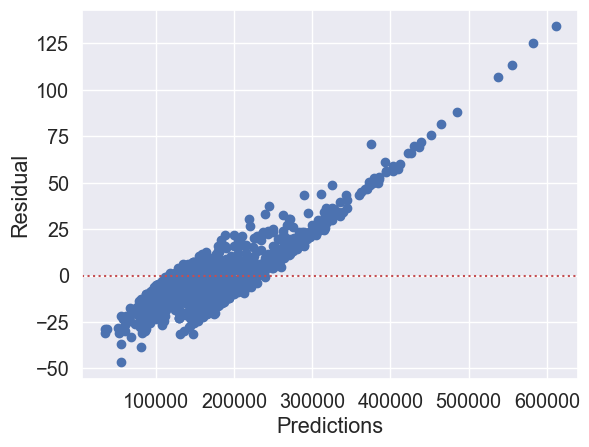

In [130]:
#  Residual Analysis and Evaluation of Linear Regression

y_res = y_train - y_pred_train
# data['res'] = y_res
plt.scatter( y_pred_train ,y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

In [131]:
# Table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       1.000000e+00          1.000000          1.000000
1   R2 Score (Test)       9.999832e-01          1.000000          1.000000
2       RSS (Train)       2.513464e-17       3711.974482     351794.191016
3        RSS (Test)       4.587267e+07       4130.942106     180863.249676
4       MSE (Train)       1.571312e-10          1.909539         18.589617
5        MSE (Test)       3.239935e+02          3.074566         20.343911

## Regularization

In [132]:
betas = pd.DataFrame(index=X.columns)

In [133]:
betas.rows = X.columns

In [134]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [135]:
pd.set_option('display.max_rows', None)
betas.head(68)

Linear          Ridge          Lasso
MSSubClass            6.770031e-11      -0.780656      -0.000000
LotFrontage           2.273737e-11       2.082718       0.000000
LotArea               2.046363e-11      19.427578       0.000000
OverallQual           7.821654e-11       5.427780       0.000000
OverallCond           1.455192e-11       4.032776       0.000000
YearBuilt             1.455192e-11       5.128868       0.000000
YearRemodAdd         -2.000888e-11       0.606200       0.000000
MasVnrArea           -3.183231e-12       2.654686       0.000000
BsmtFinSF1            4.348831e+02       6.302763       0.000000
BsmtFinSF2            1.633281e+02       0.861145       0.000000
BsmtUnfSF             4.471085e+02       0.973534       0.000000
TotalBsmtSF          -4.167863e+02       5.257939       0.000000
1stFlrSF              3.463180e+02       6.455272       0.000000
2ndFlrSF              4.039354e+02       6.322601       0.000000
LowQualFinSF          4.466422e+01      -0.383865      -0.000000
GrLivArea            -4.642608e+02       9.732610       9.950157
BsmtFullBath          3.637979e-12       0.512261       0.000000
BsmtHalfBath         -9.094947e-12      -1.118785      -0.000000
FullBath             -1.091394e-11      -0.422793       0.000000
HalfBath             -4.320100e-12       0.294981       0.000000
BedroomAbvGr          1.091394e-11      -1.920676       0.000000
KitchenAbvGr         -1.182343e-11      -5.130702      -0.000000
TotRmsAbvGrd          1.091394e-11       1.860578       0.000000
Fireplaces           -5.911716e-12       0.201342       0.000000
GarageYrBlt          -6.139089e-12       0.589277       0.000000
GarageCars           -5.002221e-11       2.248965      20.544112
GarageArea            2.023626e-11       0.628631       0.000000
WoodDeckSF           -1.006129e-11       1.761174       0.000000
OpenPorchSF          -6.312728e-12       1.243041       0.000000
EnclosedPorch         3.240075e-12       1.303672      -0.000000
3SsnPorch             1.978151e-11       1.907365       0.000000
ScreenPorch           2.455636e-11       1.409070       0.000000
PoolArea              3.456080e-11       4.741930       0.000000
MiscVal              -7.270273e-11       0.193880      -0.000000
MoSold               -2.273737e-13      -0.144311       0.000000
YrSold               -3.399236e-11       0.223735      -0.000000
SalePrice             7.668310e+04  576692.631134  576545.698664
MSZoning_FV          -4.547474e-11       3.923378      -0.000000
MSZoning_RH          -1.909939e-11       2.479459      -0.000000
MSZoning_RL          -6.309619e-11       3.169850       0.000000
MSZoning_RM          -2.455636e-11       2.039663      -0.000000
Street_Pave           2.546585e-11       3.364018       0.000000
LotShape_IR2         -1.114131e-11       0.716577       0.000000
LotShape_IR3          9.094947e-12      -0.104352       0.000000
LotShape_Reg         -5.456968e-12       0.048259      -0.000000
LandContour_HLS      -1.182343e-11       0.361209       0.000000
LandContour_Low       1.847411e-12      -1.534567       0.000000
LandContour_Lvl      -1.500666e-11       0.465613      -0.000000
Utilities_NoSeWa      2.098520e+01       0.000000       0.000000
LotConfig_CulDSac     3.637979e-12       0.882203       0.000000
LotConfig_FR2         1.989520e-11      -0.403601      -0.000000
LotConfig_FR3         8.867573e-12      -1.109789       0.000000
LotConfig_Inside      1.978151e-11       0.012538      -0.000000
LandSlope_Mod         8.384404e-12       0.217976       0.000000
LandSlope_Sev         2.501110e-11      -6.165250       0.000000
Neighborhood_Blueste -4.433787e-12       2.205112      -0.000000
Neighborhood_BrDale  -4.092726e-12       1.393538      -0.000000
Neighborhood_BrkSide -4.183676e-11       1.824656      -0.000000
Neighborhood_ClearCr -1.773515e-11       0.229501       0.000000
Neighborhood_CollgCr -1.284661e-11      -0.403473      -0.000000
Neighborhood_Crawfor -1.375611e-11       3.356718       0.00000

In [136]:
betas['Lasso_impact']=betas['Lasso'].abs()
betas.sort_values(by=['Lasso_impact'])

Linear          Ridge          Lasso  \
MSSubClass             6.770031e-11      -0.780656      -0.000000   
Exterior2nd_Stucco     1.597300e-11       1.529689      -0.000000   
Exterior2nd_VinylSd    3.910827e-11       0.843149       0.000000   
Exterior2nd_Wd Sdng    3.387868e-11       0.895244      -0.000000   
Exterior2nd_Wd Shng    7.645440e-12       0.297929       0.000000   
ExterQual_Fa           1.568878e-11      -3.861055      -0.000000   
ExterQual_Gd           1.023182e-11      -4.288514       0.000000   
ExterCond_Fa           1.296030e-11      -1.043684      -0.000000   
ExterCond_Gd           5.093170e-11      -1.588429      -0.000000   
ExterCond_Po           5.750697e-04       0.000000       0.000000   
ExterCond_TA           4.195044e-11      -0.989597       0.000000   
Foundation_CBlock      1.432454e-11       0.264544      -0.000000   
Foundation_Slab        1.011813e-11       1.879437      -0.000000   
Foundation_Stone      -1.705303e-11      -0.454653      -0.000000   
Foundation_Wood        3.183231e-12      -2.825533      -0.000000   
BsmtQual_Fa           -1.818989e-12      -1.693033      -0.000000   
BsmtQual_Gd           -7.872814e-12      -1.818443      -0.000000   
BsmtCond_Gd            4.547474e-13       0.066632       0.000000   
BsmtCond_Po            2.459444e+02       2.287283      -0.000000   
BsmtCond_TA            1.170974e-11       0.145537      -0.000000   
BsmtExposure_Gd        6.821210e-13       2.356699       0.000000   
BsmtExposure_Mn       -5.002221e-12      -0.090047       0.000000   
BsmtExposure_No        4.547474e-12      -0.378236      -0.000000   
BsmtFinType1_BLQ      -3.865352e-12       0.212023      -0.000000   
Exterior2nd_Stone      3.535661e-11      -0.204081      -0.000000   
Exterior2nd_Plywood    2.000888e-11       0.051767      -0.000000   
Exterior2nd_Other     -6.821210e-13      -1.318287       0.000000   
Exterior2nd_MetalSd    4.371259e-11      -0.250633      -0.000000   
RoofMatl_Tar&Grv      -1.398348e-11      -0.271956       0.000000   
SaleCondition_Normal   4.092726e-12       0.988883      -0.000000   
RoofMatl_WdShngl       2.364686e-11       1.166041       0.000000   
Exterior1st_AsphShn   -1.068656e-11       0.181440      -0.000000   
Exterior1st_BrkComm    9.094947e-12      -1.700862      -0.000000   
Exterior1st_BrkFace   -9.094947e-13       0.449210       0.000000   
Exterior1st_CBlock     2.514910e+01      -1.627974      -0.000000   
Exterior1st_CemntBd   -2.000888e-11       0.025163       0.000000   
Exterior1st_HdBoard   -5.275069e-11      -0.734243      -0.000000   
Exterior1st_ImStucc   -2.370036e-01       0.000000       0.000000   
Exterior1st_MetalSd   -3.910827e-11       0.037218      -0.000000   
BsmtFinType1_LwQ       5.115908e-12      -0.543271      -0.000000   
Exterior1st_Plywood   -1.216449e-11      -1.075200      -0.000000   
Exterior1st_Stucco    -1.978151e-11      -0.815189       0.000000   
Exterior1st_VinylSd   -5.894663e-11      -0.538208       0.000000   
Exterior1st_Wd Sdng   -2.023626e-11      -1.665542      -0.000000   
Exterior1st_WdShing   -1.254463e-11      -0.649539      -0.000000   
Exterior2nd_AsphShn    1.188027e-11      -0.069436      -0.000000   
Exterior2nd_Brk Cmn   -1.077716e-11       0.192040      -0.000000   
Exterior2nd_BrkFace   -1.384137e-11       1.181651       0.000000   
Exterior2nd_CBlock    -2.514910e+01      -1.627974      -0.000000   
Exterior2nd_CmentBd    2.773959e-11      -0.196955       0.000000   
Exterior2nd_HdBoard    2.637535e-11       0.170168      -0.000000   
Exterior2nd_ImStucc    7.503331e-12      -0.782359      -0.000000   
Exterior1st_Stone     -2.904699e-11      -2.501696       0.000000   
BsmtFinType1_Rec      -1.882938e-12      -0.122802      -0.000000   
BsmtFinType1_Unf      -1.534772e-11       0.899341      -0.000000   
BsmtFinType2_BLQ      -1.875833e-12      -2.017288      -0.000000   
GarageType_BuiltIn     3.569767e-11       1.501212       0.000000   
GarageType_CarPort     1.25